In [2]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import cohen_kappa_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

### Read Dataset

In [3]:
df=pd.read_csv("AB_NYC_2019.csv")
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Describing dataset

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Attributes datatypes

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Checking for null values

In [6]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### Detecting Outliers

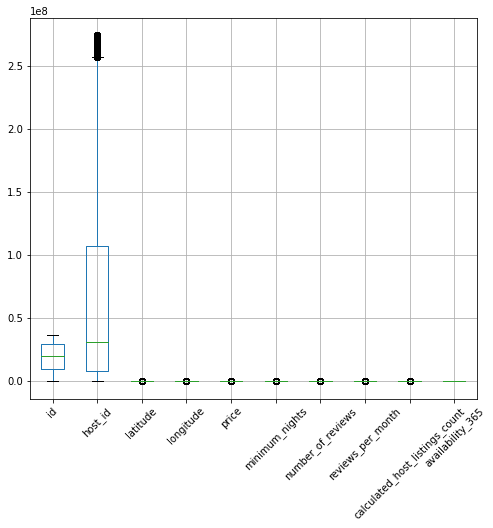

In [7]:
boxplot = df.boxplot(figsize=(8,7),rot=45)

### Filling Null values

In [8]:
df[['name', 'host_name']] = df[['name', 'host_name']].fillna(value='None')
df[['reviews_per_month']] = df[['reviews_per_month']].fillna(value=0)

### Dropping columns

In [9]:
df1= df.drop(['host_id','last_review'],axis=1)
df1.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
print(df1.isnull().sum())
df1.shape

id                                0
name                              0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


(48895, 14)

### Identifying numerical, categotical and boolean attribute

In [11]:
object_df=df1.select_dtypes(include=['object']).copy()
int_df=df1.select_dtypes(include=['int64']).copy()
categorical_columns=[]
boolean_columns=[]
numerical_columns=list(int_df.columns)
for each_column in object_df.columns:
    print(each_column + ":",len(object_df[each_column].unique()))
    if(len(object_df[each_column].unique())>2):
        categorical_columns.append(each_column)
    else:
        boolean_columns.append(each_column)
print("Categorical Columns:",categorical_columns)
print("Numerical_columns:",numerical_columns)
print("Boolean Columns:",boolean_columns)

name: 47897
host_name: 11453
neighbourhood_group: 5
neighbourhood: 221
room_type: 3
Categorical Columns: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
Numerical_columns: ['id', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
Boolean Columns: []


### Correlation Matrix

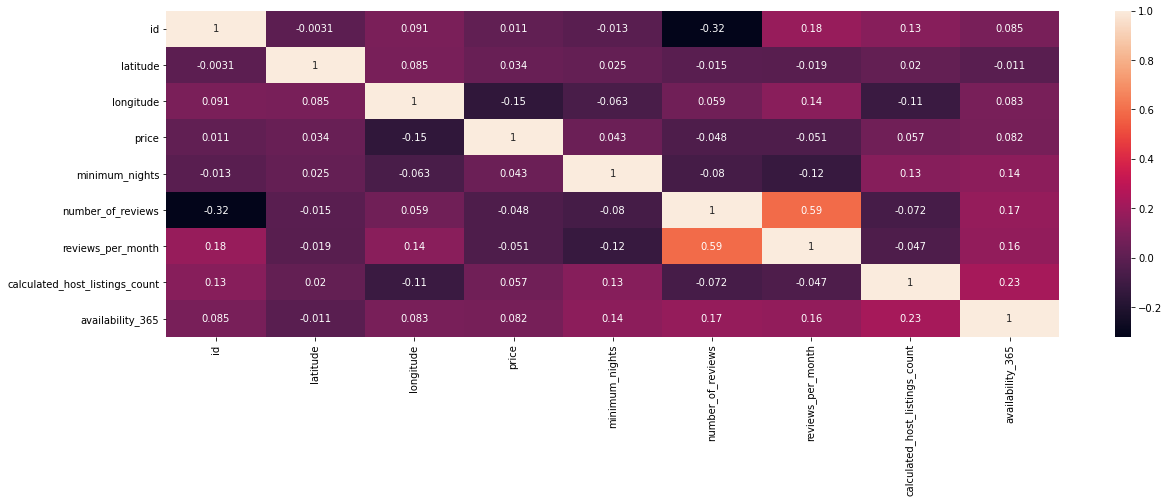

In [12]:
f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(6) 
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')
sn.heatmap(corr, annot=True)
plt.show()


In [13]:
df1.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Rearrange columns

In [14]:
#Target variable "price" was in middle and moved to the last column of dataset
df1 = df1[['id','name','host_name','neighbourhood_group','neighbourhood','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','price']]
df1.head()


,id,name,host_name,neighbourhood_group,neighbourhood,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,-73.97237,Private room,1,9,0.21,6,365,149
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,-73.98377,Entire home/apt,1,45,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,-73.94190,Private room,3,0,0.00,1,365,150
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,-73.95976,Entire home/apt,1,270,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,-73.94399,Entire home/apt,10,9,0.10,1,0,80


### Encoding Categorical values

In [15]:
X = df1.iloc[:, :12].values
Y= df1['price'].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])
labelencoder_X_6 = LabelEncoder()
X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])


labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Feature scaling 

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Using multilinear regression model

In [17]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
pred_y = regressor.predict(X_test)
mae = metrics.mean_absolute_error(pred_y , y_test)
mse = metrics.mean_squared_error(pred_y ,y_test)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,pred_y)
print("Results of MultiLinear Regression:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)


Results of MultiLinear Regression:
MAE: 56.74140454020502
MSE: 7610.705863616319
RMSE: 87.239359601136
R-Squared: 0.32820317197390914


### Grouping column "price" to perform classification

In [18]:
conditions = [
    (df1['price'] < 100),
    (df1['price'] >= 100) & (df1['price'] < 250),
     (df1['price'] >= 250) & (df1['price'] < 600),
    (df1['price'] >= 600) ]

# create a list of the values we want to assign for each condition
values = ['Bronze', 'Silver', 'Gold','Platinium']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['price_range'] = np.select(conditions, values)
df1['price_range'].value_counts()

Bronze       21877
Silver       20792
Gold          5367
Platinium      859
Name: price_range, dtype: int64

In [19]:
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
df1['price_rng_Cat'] = labelencoder.fit_transform(df1['price_range'])
df1['room_type_Cat'] = labelencoder.fit_transform(df1['room_type'])
df2=df1[['id','minimum_nights','availability_365', 
         'number_of_reviews', 'reviews_per_month','calculated_host_listings_count',
         'room_type_Cat','price','price_rng_Cat']]

### Using KNN

In [20]:
neigh = KNeighborsClassifier(n_neighbors=3)

X1=df2.iloc[:, :-1].values
Y1=df2['price_rng_Cat'].values

# Split into training and test  
X_train, X_test, y_train, y_test = train_test_split( 
             X1, Y1, test_size = 0.3, random_state=1) 

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fit the model
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(classification_report(y_test,y_pred))

mae = metrics.mean_absolute_error(y_pred, y_test)
mse = metrics.mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
print("Results of KNN:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6520
           1       0.93      0.83      0.88      1612
           2       0.96      0.93      0.94       243
           3       0.87      0.88      0.88      6294

    accuracy                           0.89     14669
   macro avg       0.91      0.89      0.90     14669
weighted avg       0.89      0.89      0.89     14669

Results of KNN:
MAE: 0.29777080918944715
MSE: 0.8430022496421024
RMSE: 0.9181515395848892
R-Squared: 0.5768522848518399


In [21]:
knn_cohen_score = cohen_kappa_score(y_test, y_pred)
print("Kappa score for KNN:",knn_cohen_score)

Kappa score for KNN: 0.8199729636536687


### Using Decision Tree

In [22]:
X = df2.iloc[:, :11].values
Y= df2['price_rng_Cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify = Y)

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test,y_pred1))


mae = metrics.mean_absolute_error(y_pred1 , y_test)
mse = metrics.mean_squared_error(y_pred1 ,y_test)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,y_pred1)
print("Results of Decision Tree:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6563
           1       1.00      1.00      1.00      1610
           2       1.00      1.00      1.00       258
           3       1.00      1.00      1.00      6238

    accuracy                           1.00     14669
   macro avg       1.00      1.00      1.00     14669
weighted avg       1.00      1.00      1.00     14669

Results of Decision Tree:
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R-Squared: 1.0


### Kappa score

In [43]:
dc_cohen_score = cohen_kappa_score(y_test, y_pred1)
print("Kappa score for KNN:",knn_cohen_score)
print("Kappa score for decision tree:",dc_cohen_score)

Kappa score for KNN: 0.8199729636536687
Kappa score for decision tree: 1.0
